<a href="https://colab.research.google.com/github/hsantos1985/R-Jobs/blob/main/TRABALHO_REGRESSAO_SIMPLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=white size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.


# <font color=white>DATASET DO PROJETO</font>

***


### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **X** - Temperatura Média (°C)
- **Y** - Consumo de Cerveja (litros)

#IMPORTAÇÃO DAS BIBLIOTECAS

In [57]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [58]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Importando o dataset

#### <font color=red>Utilize o parâmetro **sep = ';'** da função **read.csv** para importar corretamente o conjunto de dados. O dataset do projeto utiliza como separador de colunas o caractere ';'.

In [28]:
#obtendo o dataset
dados<-read.csv('/content/dados_projeto.csv', sep=';')

In [29]:
head(dados)

,Y,X
,<int>,<dbl>
1,25461,27.30
2,28972,27.02
3,30814,24.82
4,29799,23.98
5,28900,23.82
6,28218,23.78


#Análise descritiva dos dados 

In [30]:
summary(dados)

       Y               X        
 Min.   :14343   Min.   :12.90  
 1st Qu.:22008   1st Qu.:19.02  
 Median :24867   Median :21.38  
 Mean   :25401   Mean   :21.23  
 3rd Qu.:28631   3rd Qu.:23.28  
 Max.   :37937   Max.   :28.86  

In [31]:
nrow(dados)

[1] 365

#Análise gráfica

Warning message:
“`position_stack()` requires non-overlapping x intervals”


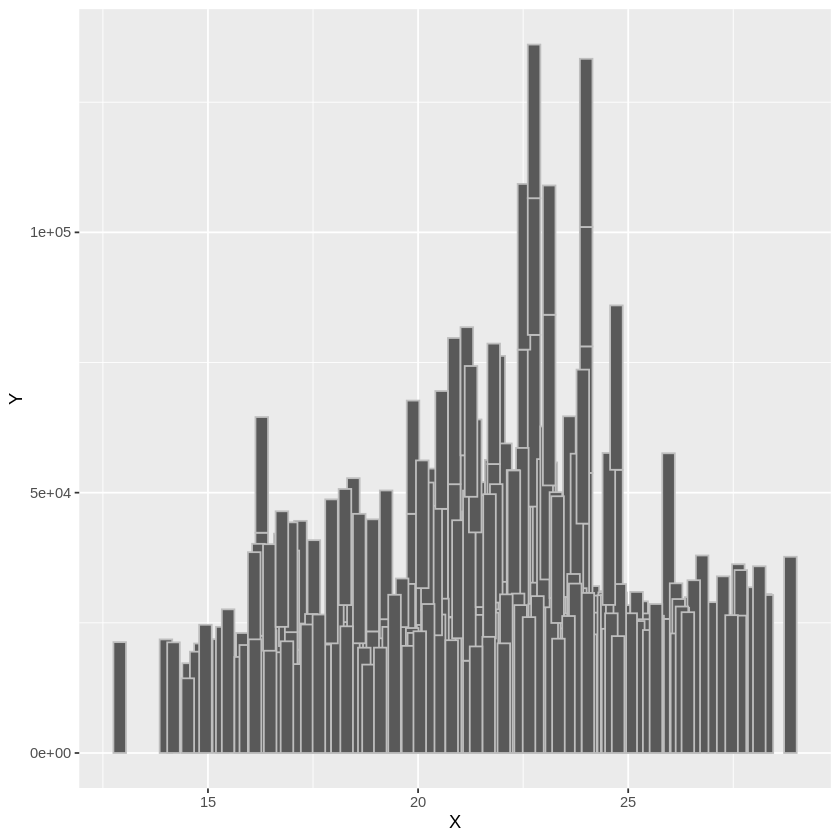

In [34]:
#Gráficos de barra
ggplot(
  dados, aes(x=X,y=Y))+
    geom_bar(stat='identity', width=.30, color='gray')



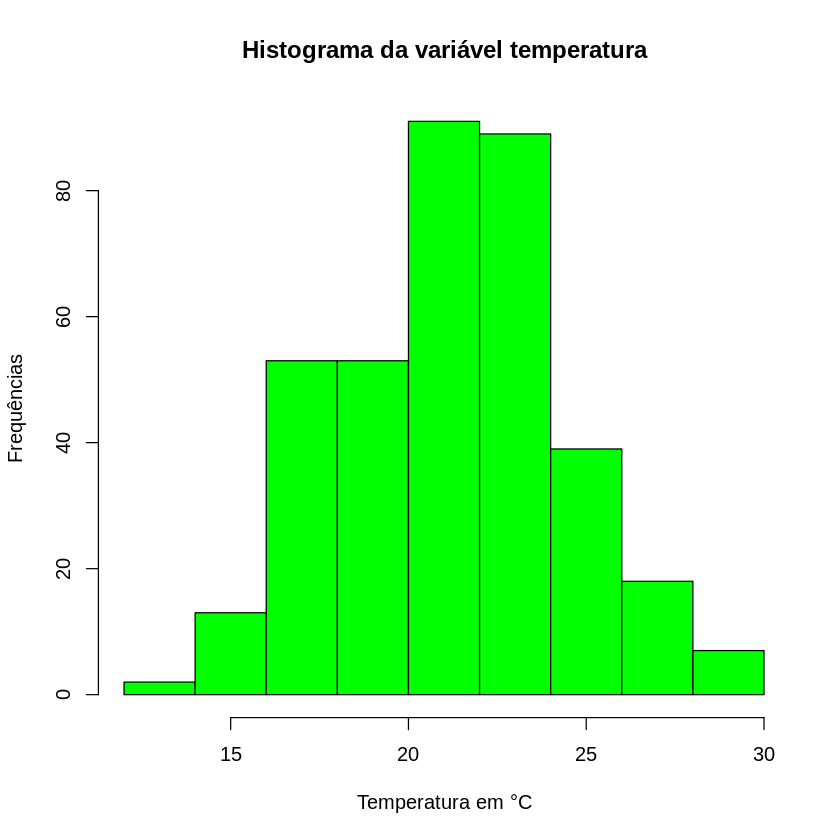

In [21]:
#Histograma
hist(
  x=dados$X,
  col = 'green',
  main = 'Histograma da variável temperatura',
  xlab = 'Temperatura em °C',
  ylab = 'Frequências'
)

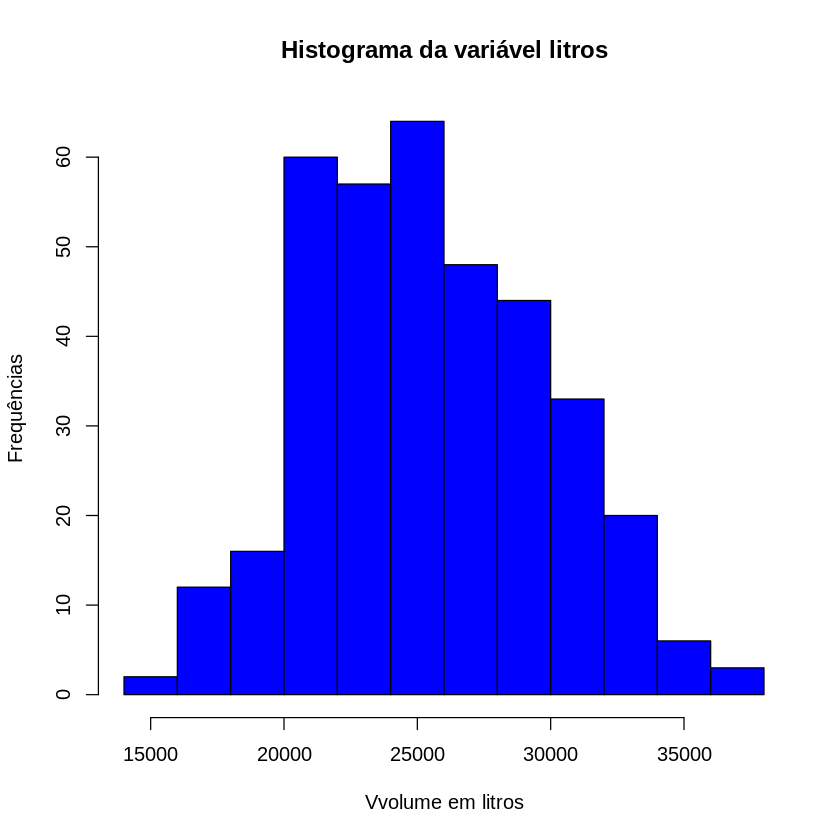

In [22]:
hist(
  x=dados$Y,
  col = 'blue',
  main = 'Histograma da variável litros',
  xlab = 'Vvolume em litros',
  ylab = 'Frequências'
)

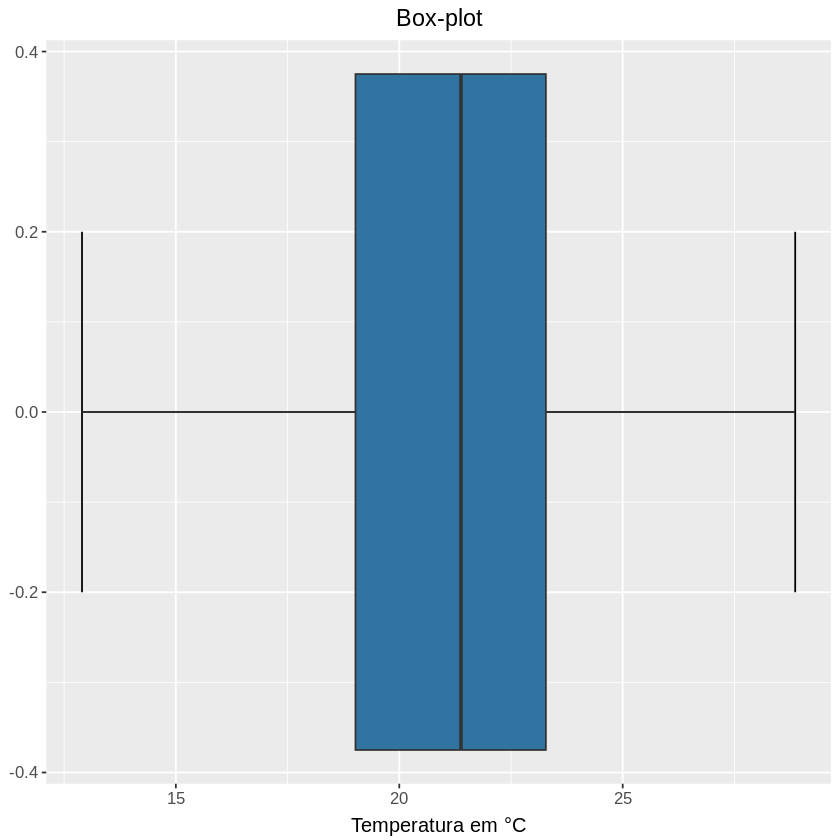

In [94]:
#BOXPLOT 
#PARA VARIÁVEL X - temperatura
ggplot(dados, aes(y = X)) + 
  stat_boxplot(geom ='errorbar', width = 0.4) + 
  geom_boxplot(fill = c('#3274A1')) + 
  coord_flip() +
  ylab("Temperatura em °C") + 
  ggtitle('Box-plot') +
  theme(
    plot.title=element_text(size = 14, hjust = 0.5),
    axis.title.y=element_text(size = 12, vjust = +0.2),
    axis.title.x=element_text(size = 12, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10),
  )



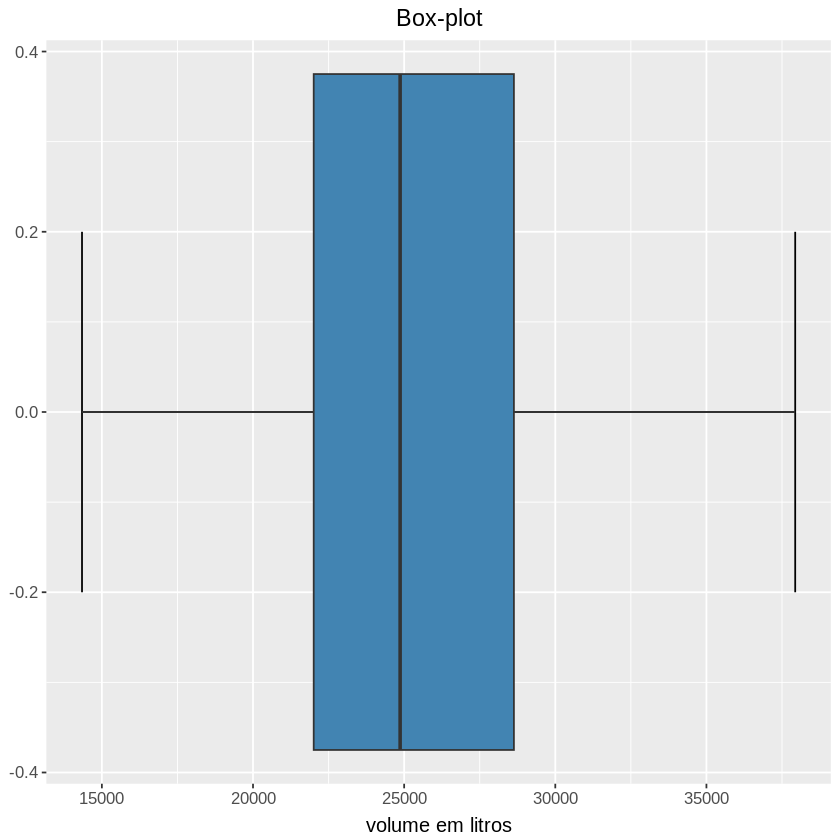

In [98]:
#PARA VARIÁVEL Y - volume em litros
ggplot(dados, aes(y = Y)) + 
  stat_boxplot(geom ='errorbar', width = 0.4) + 
  geom_boxplot(fill = c('#4284b2')) + 
  coord_flip() +
  ylab("volume em litros") + 
  ggtitle('Box-plot') +
  theme(
    plot.title=element_text(size = 14, hjust = 0.5),
    axis.title.y=element_text(size = 12, vjust = +0.2),
    axis.title.x=element_text(size = 12, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10),
  )

No id variables; using all as measure variables



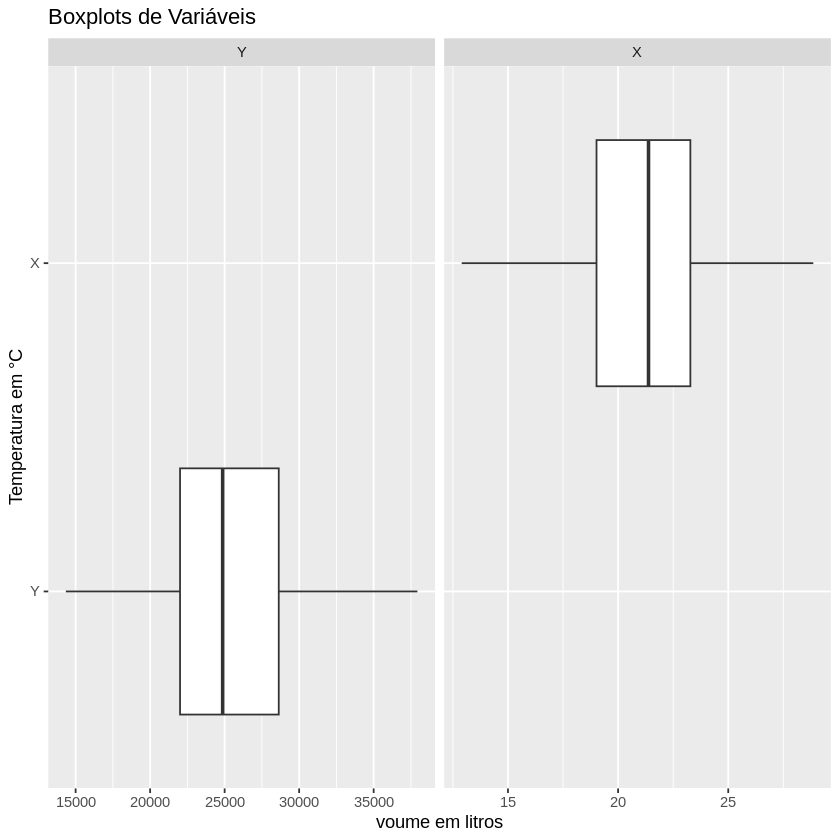

In [63]:
#BOXPLOT UNIFICADO
ggplot(melt(dados), aes(x = variable, y = value)) +
  geom_boxplot() +
  facet_grid(. ~ variable, scales = "free") +
  labs(x = "Temperatura em °C", y = "voume em litros") +
   coord_flip() +
  ggtitle("Boxplots de Variáveis")

Warning message in geom_smooth(metho = lm):
“Ignoring unknown parameters: `metho`”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


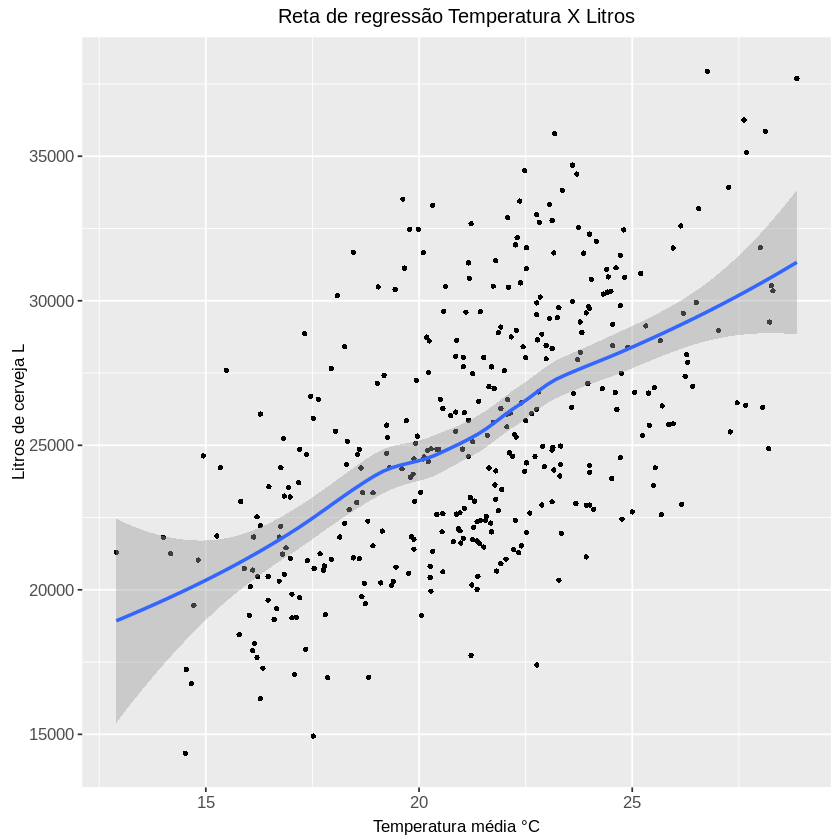

In [14]:
#Análise gráfica de regressão
ggplot(data=dados, aes(x=X, y=Y))+
  geom_point(size=1.5, stroke=0)+
  geom_smooth(metho=lm)+
  xlab('Temperatura média °C')+
  ylab('Litros de cerveja L')+
  ggtitle('Reta de regressão Temperatura X Litros')+

  theme(
    plot.title=element_text(size = 12, hjust = 0.5),
    axis.title.y=element_text(size = 10, vjust = +0.2),
    axis.title.x=element_text(size = 10, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10),
  )



### Identificação da existência da relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

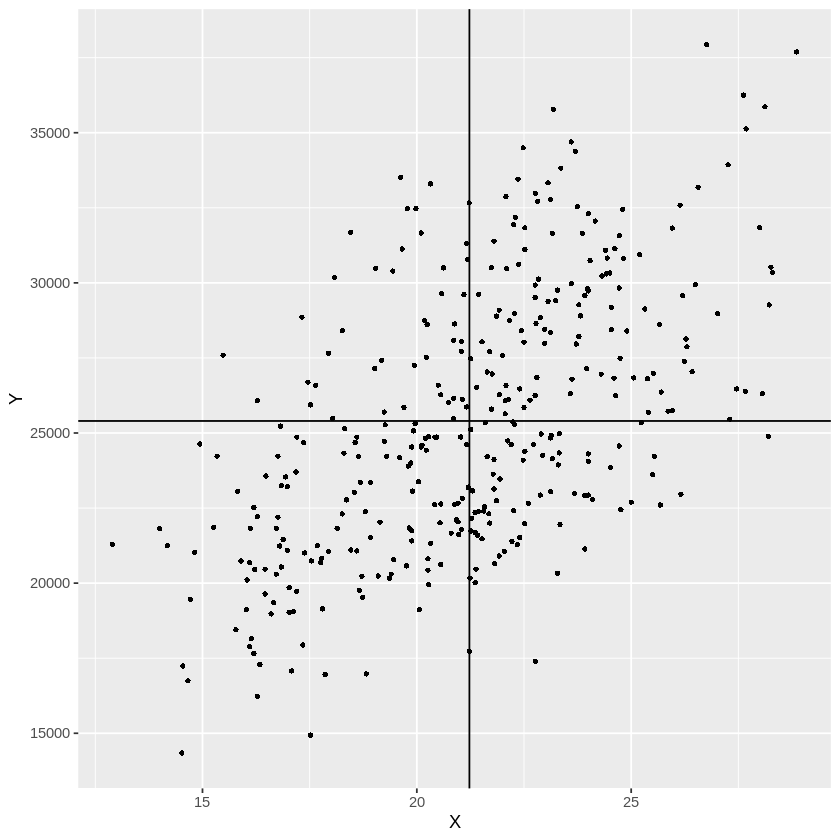

In [67]:
grafico <- dados
ggplot(data = grafico, aes(x = X, y = Y)) + 
  geom_point(size = 1.5, stroke = 0) + 
  geom_hline(yintercept = mean(dados$Y), color = 'black') + 
  geom_vline(xintercept = mean(dados$X), color = 'black')

### <font color='white'>Utilizando a matriz de correlação</font>

In [68]:
cor(dados)

,Y,X
Y,1.0000000,0.5746147
X,0.5746147,1.0000000


### <font color='white'>Conclusões parciais</font>

### É possível verificar que:
Graficamente que existe relação linear entre as variáveis

Essa relação e media já que a correlação de pearson é de 0,57

Apesar dessa correlação, não é possível verificar uma relação de causalidade entre as variáveis

### <font color='white'>Modelo de Regressão</font>

In [73]:
resultado_regressao<-lm(formula=Y ~ X,data=dados)
resumo<-summary(resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-9221.4 -2845.5  -315.3  2409.0  9392.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8528.91    1275.36   6.687  8.6e-11 ***
X             794.88      59.42  13.377  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3605 on 363 degrees of freedom
Multiple R-squared:  0.3302,	Adjusted R-squared:  0.3283 
F-statistic: 178.9 on 1 and 363 DF,  p-value: < 2.2e-16


### $Y$ previsto

In [75]:
head(fitted.values(resultado_regressao))

1        2        3        4        5        6 
30229.20 30006.63 28257.89 27590.19 27463.01 27431.21

In [76]:
resultado_regressao$fitted.values

1        2        3        4        5        6        7        8 
30229.20 30006.63 28257.89 27590.19 27463.01 27431.21 27606.09 28321.48 
       9       10       11       12       13       14       15       16 
30944.59 29799.96 30483.56 29164.06 28814.31 29164.06 29084.57 29593.29 
      17       18       19       20       21       22       23       24 
31469.22 30992.29 30960.49 30531.26 28655.33 25809.65 25253.24 26906.59 
      25       26       27       28       29       30       31       32 
27924.04 26334.28 27288.14 28941.49 28400.97 26652.23 25730.17 27733.27 
      33       34       35       36       37       38       39       40 
26397.87 26938.39 26111.71 24649.13 25269.13 25905.04 26620.43 27606.09 
      41       42       43       44       45       46       47       48 
27542.50 28703.03 30515.36 28830.21 27860.45 26731.72 25698.37 26620.43 
      49       50       51       52       53       54       55       56 
26191.20 27542.50 28178.40 28559.95 27955.84 28718.92 27844.55 26207.09 
      57       58       59       60       61       62       63       64 
27685.58 28114.81 26334.28 25428.11 26143.50 26938.39 27351.73 27939.94 
      65       66       67       68       69       70       71       72 
26493.25 25952.73 26175.30 25507.60 26906.59 26715.82 26222.99 26286.58 
      73       74       75       76       77       78       79       80 
26715.82 26079.91 25952.73 25952.73 25412.21 25841.45 25730.17 25126.05 
      81       82       83       84       85       86       87       88 
24188.09 24331.17 25205.54 25666.57 26795.31 27065.57 27033.77 26127.61 
      89       90       91       92       93       94       95       96 
26413.76 26922.49 26429.66 25157.85 25237.34 26302.48 26668.13 25507.60 
      97       98       99      100      101      102      103      104 
22343.97 23377.31 23949.63 24792.20 25809.65 24362.97 25126.05 25777.86 
     105      106      107      108      109      110      111      112 
25968.63 25428.11 25555.29 27097.36 26413.76 27606.09 26429.66 24474.25 
     113      114      115      116      117      118      119      120 
25380.42 26429.66 23774.75 23663.47 24283.48 24633.23 23361.42 21421.90 
     121      122      123      124      125      126      127      128 
22312.17 23838.34 25253.24 24394.76 22948.08 22646.02 22677.82 21358.31 
     129      130      131      132      133      134      135      136 
22868.59 21994.22 22725.51 22137.30 21517.29 21819.34 21914.73 22184.99 
     137      138      139      140      141      142      143      144 
23043.46 23313.72 23345.52 23425.01 23997.32 24633.23 24378.87 25857.35 
     145      146      147      148      149      150      151      152 
26064.02 25444.01 26763.51 23281.93 22582.43 22455.25 21469.59 21469.59 
     153      154      155      156      157      158      159      160 
21278.82 22789.10 23122.95 23091.16 24156.30 24919.39 25110.16 24680.92 
     161      162      163      164      165      166      167      168 
24855.79 26588.64 23472.70 25300.93 26620.43 21262.93 20309.07 24267.58 
     169      170      171      172      173      174      175      176 
24331.17 20181.89 21103.95 22296.27 23266.03 23647.57 20086.50 20229.58 
     177      178      179      180      181      182      183      184 
20658.81 20722.41 20833.69 22200.89 23917.83 22661.92 22200.89 22455.25 
     185      186      187      188      189      190      191      192 
20404.45 18782.89 21072.15 21882.93 22057.81 22471.15 23822.45 22407.56 
     193      194      195      196      197      198      199      200 
24680.92 26064.02 27049.67 24569.64 24331.17 23742.96 24585.53 24410.66 
     201      202      203      204      205      206      207      208 
24871.69 21819.34 20070.60 22057.81 23202.44 21167.54 21898.83 21723.96 
     209      210      211      212      213      214      215      216 
21612.67 21406.00 21851.14 23822.45 24251.68 24506.05 25348.62 25253.24 
     217      218      219      220      221      222      223   

### Utilizando o modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [77]:
predict(resultado_regressao, data.frame(X=(42)))

1 
41913.97

###Ou seja:
para uma temperatura de 42°C o volume de cerveja consumido é de 41913.97 L

###Resíduos da regressão

In [78]:
residuos<-resultado_regressao$residuals
head(residuos)

1         2         3         4         5         6 
-4768.201 -1034.633  2556.108  2208.809  1436.991   786.786

### Plotando um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

In [87]:
dados_residuos<-data.frame(
residuos=c(resultado_regressao$residuals),
previsto=c(resultado_regressao$fitted.values)
)

dados_residuos

,residuos,previsto
,<dbl>,<dbl>
1,-4768.20054,30229.20
2,-1034.63343,30006.63
3,2556.10815,28257.89
4,2208.80948,27590.19
5,1436.99068,27463.01
6,786.78599,27431.21
7,2125.91183,27606.09
8,75.51754,28321.48
9,-6058.59483,30944.59


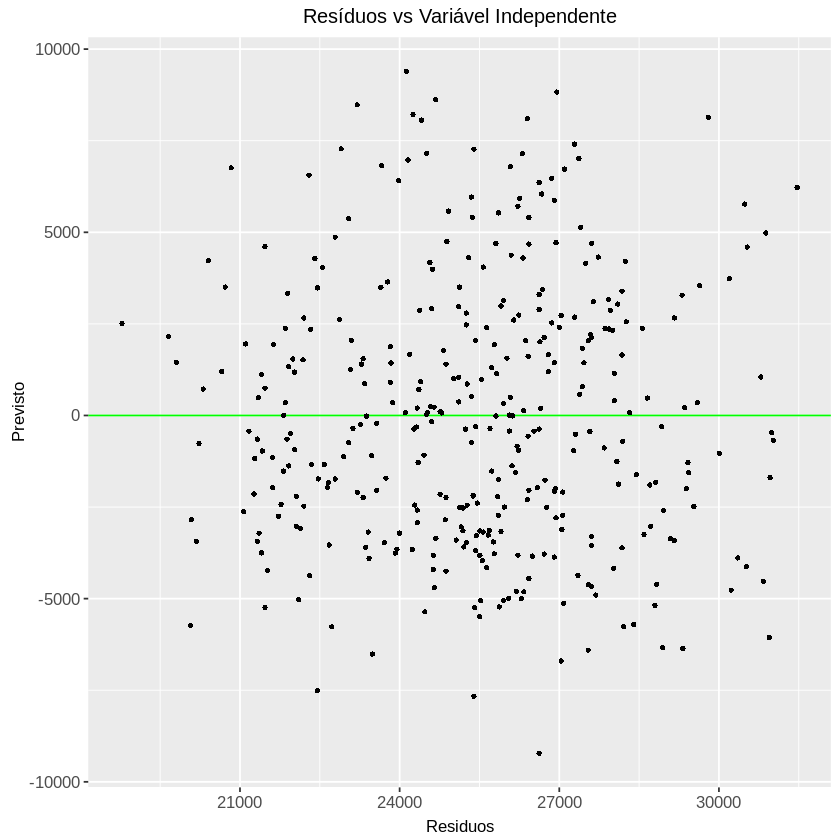

In [101]:
ggplot(data=dados_residuos, aes(x=previsto, y=residuos))+
  geom_hline(yintercept=0, color='green')+
  geom_point(size=1.5, stroke=0)+
  xlab('Residuos')+
  ylab('Previsto')+
  ggtitle('Resíduos vs Variável Independente')+

  theme(
    plot.title=element_text(size = 12, hjust = 0.5),
    axis.title.y=element_text(size = 10, vjust = +0.2),
    axis.title.x=element_text(size = 10, vjust = -0.2),
    axis.text.y=element_text(size = 10),
    axis.text.x=element_text(size = 10),
  )

### Obtendo o R² da regressão 

In [93]:
#obtendo o R²
resumo<-summary(resultado_regressao)
resumo$r.squared

[1] 0.330182